# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**План работы:**
* 1. Загрузите и изучите данные.
* 2. Ответьте на вопрос и обоснуйте решение. 
    Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    * a. Изменится. Приведите примеры матриц.
    * b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
* 3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
* 4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных

In [1]:
#загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
data.duplicated().sum()

153

In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

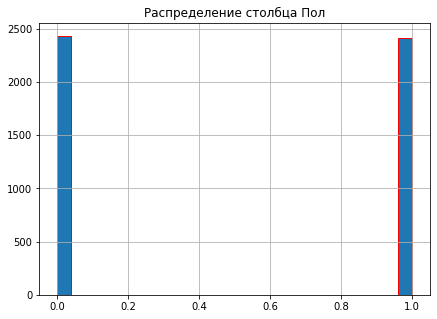

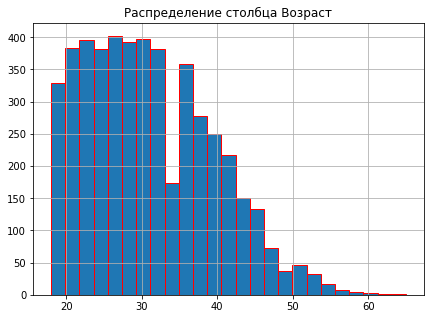

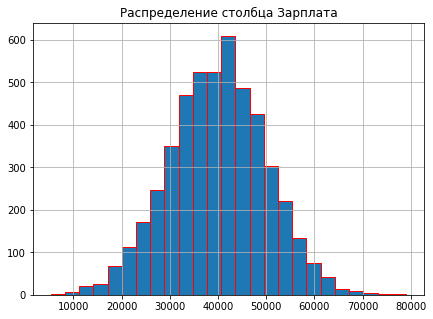

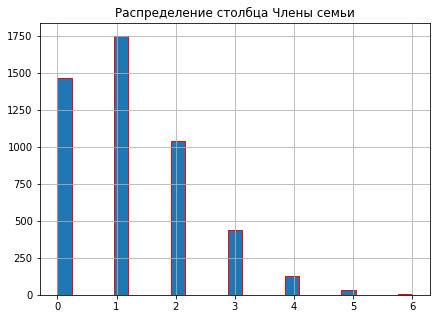

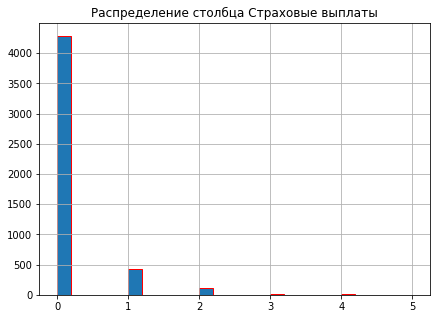

In [8]:
# Проанализируем гистограммы столбцов
for column in data.columns:
    plt.figure(figsize=(7,5))
    data[column].hist(bins=25, edgecolor='r')
    plt.title(f'Распределение столбца {column}')
    plt.show()

<AxesSubplot:title={'center':'Корреляция между признаками'}>

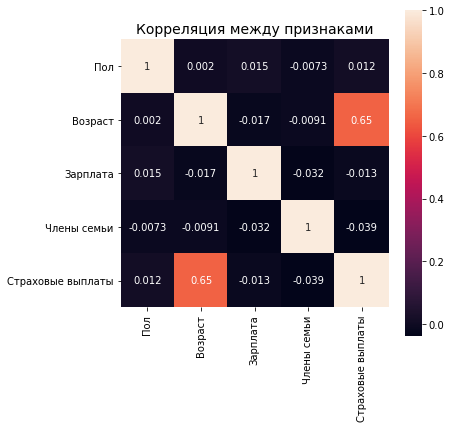

In [9]:
plt.figure(figsize = (6,6))
plt.title('Корреляция между признаками', size=14)
sns.heatmap(data.corr(), annot = True, square=True)

**Вывод:**
* Пропусков нету
* Дубликаты удалены
* Выбросов нету
* Типы данных не требуют преобразования
* Значительная корреляция только между целевым признаком(количество выплат) и возрастом клиента

Данные готовы

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество Линейной регрессии НЕ ИЗМЕНИТСЯ.

**Обоснование:** 

Формула предсказания после преобразования:
$$
a^{'} = XPw^{'}
$$
Вектор весов $w^{'}$ после преобразования:
$$
w^{'} = ((XP)^T XP)^{-1} (XP)^T y
$$
Тогда выразим предсказания через новый вектор весов:
$$
a^{'} = XP((XP)^T XP)^{-1} (XP)^T y
$$
Раскроем скобки для транспонируемых матриц при этом меняем порядок умножения:
$$
a^{'} = XP(P^T X^T XP)^{-1} P^T X^T y
$$
Теперь раскроем скобки для инверсии, порядок тоже меняется:
$$
a^{'} = XP (P)^{-1}(P^T X^T X)^{-1} P^T X^T y
$$
Для удобства оставим выражение $(X^T X)^{-1}$ в инверсии, чтобы потом выразить формулу обучения:
$$
a^{'} = XP (P)^{-1}(X^T X)^{-1} P^{T-1} P^T X^T y
$$
Увидели, что у нас есть произведение матриц на обратную им, а это даёт единичную матрицу, также умножение любой матрицы на единичную матрицу получается исходная матрица ($E = 1$):
$$
a^{'} = XE(X^T X)^{-1} E X^T y
$$
$$
a^{'} = X(X^T X)^{-1} X^T y
$$
А это равносильно формуле предсказаний, для исходного набора признаков, т.к. $w = (X^T X)^{-1} X^T y$:
$$
a^{'} = Xw
$$
**что и требовалось доказать $a^{'} = a$**

Итог: если любую матрицу Р умножить на единичную или наоборот, получится та же матрица Р. Поэтому матрицы будут одинаковыми, а значит и качество линейной регрессии при этом не изменится.

Параметры линейной регрессии $w$ и $w_P$ связаны следующим образом:
$$
w_P = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = (P)^{-1}(X^T X)^{-1} P^{T-1} P^T X^T y = (P)^{-1} (X^T X)^{-1} E X^T y = (P)^{-1} (X^T X)^{-1} X^T y = (P)^{-1} w
$$

$$
w_P = (P)^{-1} w
$$

## Алгоритм преобразования

**Алгоритм**

1) Методом np.random.normal создаем случайную матрицу

2) Методом np.linalg.inv() проверяем полученную случайную матрицу на обратимость. Если ошибка не выскочила, значит наша матрица обратима, но если матрица оказалась не обратима (вероятность этого очень мала), необходимо создать новую случайную матрицу.

3) Умножаем нашу матрицу признаков на случайную обратимую матрицу и получаем матрицу с закодированными данными о клиентах.

После этого можно будет переходить к обучению моделей линейной регрессии.

**Обоснование**

Такой алгоритм позволит защитить персональную информацию клиентов и при этом не повлияет на качество модели (до этого мы как раз доказали, что качество модели не изменится, если матрицу признаков умножать на обратимую модель).

## Проверка алгоритма

**Разделим данные на признаки и целевой признак**

In [10]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [11]:
print('Признаки', features.shape)
print('Целевой признак', target.shape)

Признаки (4847, 4)
Целевой признак (4847,)


Создадим матрицу признаков

In [12]:
features_matrix = features.values
#features_matrix.columns = features.columns
features_matrix

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Создадим произвольную матрицу у которой длина равна ширине нашей выборки

In [13]:
def get_rand_matrix(loc, size):
    det = 0
    while det == 0:
        matrix = np.random.normal(loc = loc, size=size)
        det = np.linalg.det(matrix)
    return matrix

Вызовим функцию для получения обратимой матрицы, мы знаем, что она точно обратима, т.к. функция возвращает обратимую матрицу только после ее предварительной проверки на обратимость, поэтому в случае если матрица окажется не обратимой код не остановится.

In [14]:
random_matrix = get_rand_matrix(3, (4, 4))
random_matrix

array([[1.97048318, 2.23231837, 4.11279076, 3.56403481],
       [2.98717603, 2.30146688, 3.0700695 , 3.15590447],
       [2.46405753, 3.26176449, 3.23790767, 3.42913966],
       [4.23017828, 3.526466  , 4.93598964, 3.07415597]])

Обратимая матрица имеет размер 4 * 4, потому что умножение матрицы на матрицу возможно, если ширина первой матрицы А (𝑚×𝑛) равна высоте второй матрицы В (𝑛×r). Произведение A и B даст матрицу размера m×r. Датасет, признаки которого необходимо закодировать имеет размерность 4847 * 4. Чтобы после умножения его на обратимую матрицу получить датасет такой же размерности, размерность обратимой матрицы должна быть 4 * 4.

Умножим матрицу признаков на произвольную обратимую матрицу

In [16]:
encoded_matrix = features_matrix @ random_matrix
encoded_matrix

array([[122345.92815495, 161883.63747684, 160735.14227805,
        170221.35760921],
       [ 93775.82625348, 124056.44444482, 123186.65081226,
        130455.5529942 ],
       [ 51831.83614525,  68563.7967645 ,  68085.09317703,
         72103.45417397],
       ...,
       [ 83599.75399942, 110626.8983756 , 109836.34352999,
        116317.10101145],
       [ 80655.05998208, 106723.14270944, 105966.04324016,
        112215.08341436],
       [100130.57713497, 132497.83802526, 131554.06230532,
        139318.07387496]])

### Исходные данные

**Выделим тестовую и тренировочную выбрки**

In [17]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=42)

Посмотрим размеры получившихся выборок:

In [18]:
print(f'Размер тренировочной выборки: features = {train_features.shape}; target = {train_target.shape}')
print(f'Размер тестовой выборки: features = {test_features.shape}; target = {test_target.shape}')

Размер тренировочной выборки: features = (3635, 4); target = (3635,)
Размер тестовой выборки: features = (1212, 4); target = (1212,)


In [19]:
class LinearRegressionBefore:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Вычислим значения R2 и MSE для предсказанных значений по изначальным данным

In [20]:
model_before = LinearRegressionBefore()
model_before.fit(train_features, train_target)
predict_before = model_before.predict(test_features)

r2_score_before = r2_score(test_target, predict_before)
mse_before = mean_squared_error(predict_before, test_target)

print("R2_score:", r2_score_before)
print("MSE:", mse_before)

R2_score: 0.44346330831611946
MSE: 0.1341509148078507


### Преобразованные данные

**Выделим тестовую и тренировочную выбрки у преобразованных данных**

In [21]:
train_features_encoded, test_features_encoded, train_target_encoded, test_target_encoded = train_test_split(
    encoded_matrix, target, test_size=0.25, random_state=42)

Посмотрим размеры получившихся преобразованных выборок:

In [22]:
print(f'Размер тренировочной преобразованной выборки: features = {train_features_encoded.shape}; target = {train_target_encoded.shape}')
print(f'Размер тестовой преобразованной выборки: features = {test_features_encoded.shape}; target = {test_target_encoded.shape}')

Размер тренировочной преобразованной выборки: features = (3635, 4); target = (3635,)
Размер тестовой преобразованной выборки: features = (1212, 4); target = (1212,)


In [23]:
class LinearRegressionAfter:
    def fit(self, train_features_encoded, train_target_encoded):
        X = np.concatenate((np.ones((train_features_encoded.shape[0], 1)), train_features_encoded), axis=1)
        y = train_target_encoded
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features_encoded):
        return test_features_encoded.dot(self.w) + self.w0

Вычислим значения R2 и MSE для предсказанных значений по преобразованным данным

In [24]:
model_after = LinearRegressionAfter()
model_after.fit(train_features_encoded, train_target_encoded)
predict_after = model_after.predict(test_features_encoded)

r2_score_after = r2_score(test_target_encoded, predict_after)
mse_after = mean_squared_error(predict_after, test_target_encoded)

print("R2_score:", r2_score_after)
print("MSE:", mse_after)

R2_score: 0.4434632853054763
MSE: 0.134150920354473


**Сравним изменилось ли качество линейной регрессии до и после преобразования?**

In [25]:
rezult = pd.DataFrame(index=['R2_score','MSE'], columns=['Неизменённая матрица', 'Изменённая матрица'])
rezult['Неизменённая матрица'] = r2_score_before, mse_before
rezult['Изменённая матрица'] = r2_score_after, mse_after

rezult.T

,R2_score,MSE
Неизменённая матрица,0.443463,0.134151
Изменённая матрица,0.443463,0.134151


Метрики почти идентичны, а это значит, что качество модели линейной регрессии после преобразования данных не изменилось.

## Вывод:
1) Ознакомились с данными, проверили на наличие пропусков, аномалий и дубликатов, пропусков и аномалий не было, а дубликатов было не много поэтому мы их удалили, также посмотрели на зависимость между признаками.

2) Ответили на вопрос, что качество линейной регрессии не изменится если признаки умножить на обратимую матрицу, доказав это теоритическим доказательством(так как если любую матрицу Р умножить на единичную или наоборот, получится та же матрица Р).

3) Составили алгоритм преобразования, по которому в следующем пункте преобразовали данные.

4) Сначало подготовили все данные для построения модели: разделили данные на признаки и целевой признак, записали признаки в матрицу признаков, написали функцию для получения рандомной обратимой матрицы, чтобы в случае если бы матрица оказалось не обратимой код не остановился, умножали матрицу признаков на обратимую случайную матрицу. Затем по исходным данным получили качество модели: веделили тренировую и тестовую выборки по исходным данным, построили класс для подсчета метрик r2_score и mse, затем все тоже самое сделали для преобразованных данных. Качество модели по исходным и преобразованным данным почти в точности совпадают(ниже табличка с результатами).
 
В результате мы разработали такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, и при этом нужно было защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось, чего мы и достигли. 
Таким образом мы выполнили требования поставелнной задачи страхавой компании «Хоть потоп».

In [26]:
rezult.T

,R2_score,MSE
Неизменённая матрица,0.443463,0.134151
Изменённая матрица,0.443463,0.134151
